<a href="https://colab.research.google.com/github/yneha70/IIIT-AIML_Project_and_labs/blob/main/Project_of_module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
!pip3 -q install biopython

import pandas as pd
import numpy as np
from Bio import SeqIO
from tqdm.autonotebook import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 74.6 MB/s eta 0:00:00


/tmp/ipython-input-4048425673.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [27]:
from google.colab import files
uploaded = files.upload()


Saving INDIA_685.csv to INDIA_685.csv


In [28]:
data = pd.read_csv("INDIA_685.csv")
data.tail()

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,EPI_ISL_436137,Asia / India / Karnataka,Karnataka,Human,Female,28,Asymptomatic,21-04-2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C1281T', 'C4158T', 'G11083T', 'C13730T', 'C2..."
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,EPI_ISL_436138,Asia / India / Karnataka,Karnataka,Human,Male,38,Asymptomatic,23-04-2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,EPI_ISL_436139,Asia / India / Karnataka,Karnataka,Human,Male,20,Symptomatic,23-04-2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,EPI_ISL_436140,Asia / India / Karnataka,Karnataka,Human,Female,52,Asymptomatic,24-04-2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,EPI_ISL_436141,Asia / India / Karnataka,Karnataka,Human,Female,27,Asymptomatic,24-04-2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."


In [36]:
from google.colab import files
uploaded = files.upload()


Saving sequences.fasta to sequences.fasta


In [37]:
fasta_sequences = SeqIO.parse(open("sequences.fasta"),'fasta')

counter = 0
for fasta in fasta_sequences:
    counter +=1

print("Number of sequences is:", counter)

Number of sequences is: 2


In [38]:
def calc_score(examplesequence):

    position = 0
    score = 0
    value = 0
    flag = 0

    for base in examplesequence:

        if(base == "A" or base == "a"):
            value = 0
        elif(base == "G" or base == "g"):
            value = 1
        elif(base == "T" or base == "t"):
            value = 2
        elif(base == "C" or base == "c"):
            value = 3
        else:
            flag=1

        score += (4 ** position)* value
        position+=1

    return (flag,score)

calc_score("ATAGTAG")

(0, 4680)

In [39]:
k=7
big_matrix = []
sequences_name = []

fasta_sequences = SeqIO.parse(open("sequences.fasta"),'fasta')

for fasta in tqdm(fasta_sequences):

    embedding = np.zeros(4**k, dtype=int)
    sequence = str(fasta.seq)
    sequence_name = fasta.id
    sequences_name.append(sequence_name)

    for j in range(len(sequence)-k+1):
        kmer = sequence[j:j+k]
        flag,score = calc_score(kmer)
        if(flag!=1):
            embedding[score]+=1

    embedding = embedding.tolist()
    big_matrix.append(embedding)

0it [00:00, ?it/s]

In [40]:
print("Number of sequences:", len(sequences_name))
print("Number of features for each sequence:", len(big_matrix[0]))

Number of sequences: 2
Number of features for each sequence: 16384


In [41]:
from sklearn.decomposition import PCA

pca = PCA() # create a PCA object
pca.fit(big_matrix) # do the math
pca_data = pca.transform(big_matrix) # get PCA coordinates for the matrix

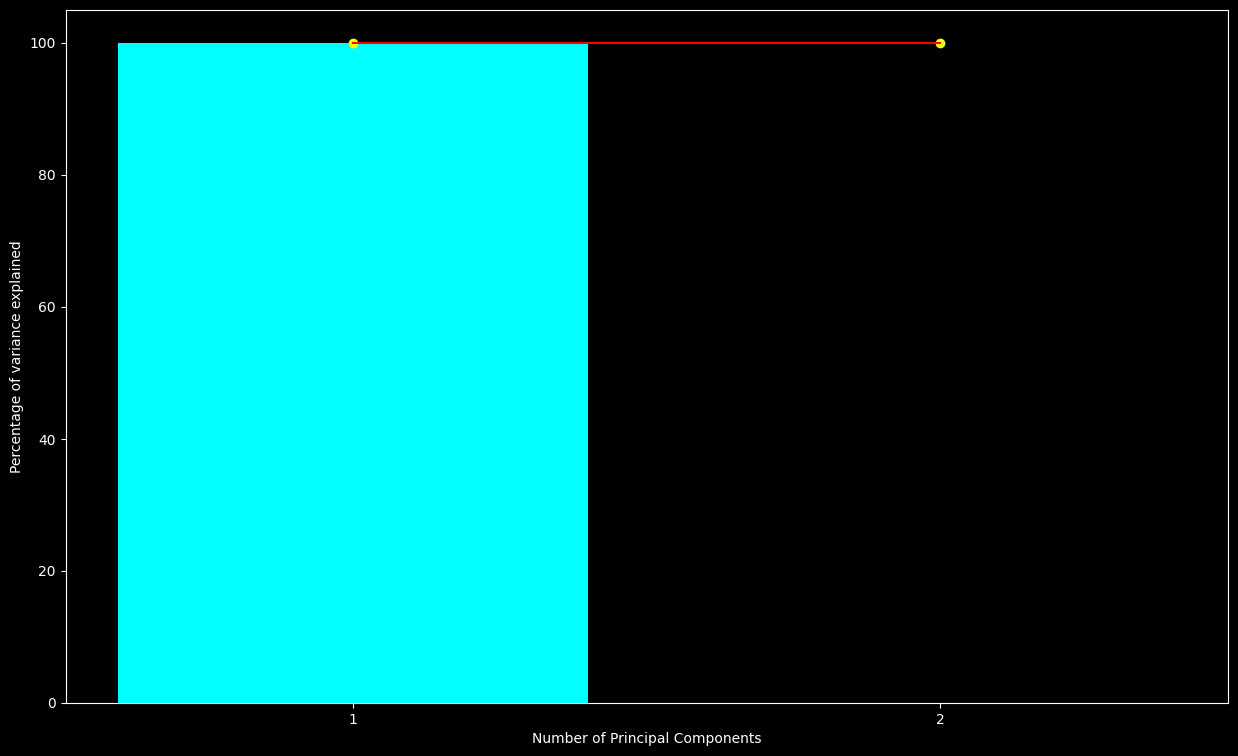

In [42]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [48]:
from google.colab import files
uploaded = files.upload()

Saving INDIA_685.csv to INDIA_685 (1).csv


In [49]:
from google.colab import files
uploaded = files.upload()

Saving sequences.fasta to sequences (1).fasta


In [52]:
import plotly.graph_objs as go
import plotly.express as px

In [57]:
dicti = {}
dicti["PC1"] = pca_df["PC1"].loc[sample]
dicti["PC2"] = pca_df["PC2"].loc[sample]
if "PC3" in pca_df.columns:
    dicti["PC3"] = pca_df["PC3"].loc[sample]
strain_data = data[data["StrainID"] == sample]
if not strain_data.empty:
    dicti["State"] = strain_data["State"].tolist()[0]
else:
    dicti["State"] = "Unknown"


In [58]:
import plotly.graph_objs as go
import plotly.express as px

In [60]:
import pandas as pd
import plotly.express as px
df = pd.DataFrame({
    "PC1": for_x,
    "PC2": for_y,
    "State": for_states,
    "StrainID": for_hover
})
fig = px.scatter(df, x="PC1", y="PC2", color="State", hover_name="StrainID",
                 title="Principal Component Axis",
                 color_discrete_map={
                     "Stateless": "grey",

                 })
fig.show()


In [64]:
from sklearn.manifold import TSNE
import numpy as np
big_matrix = np.array(big_matrix)
n_samples = big_matrix.shape[0]
perplexity = min(30, n_samples - 1)
model = TSNE(n_components=2, random_state=42, perplexity=perplexity, max_iter=1000)
tsne_data = model.fit_transform(big_matrix)


In [67]:
final_df = pd.DataFrame()

for i in range(len(tsne_data)):
    dicti = {}
    dicti["StrainID"] = data["StrainID"].iloc[i]  # or from your own list
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]

    match = data[data["StrainID"] == dicti["StrainID"]]
    if not match.empty:
        dicti["State"] = match["State"].tolist()[0]
    else:
        dicti["State"] = "Unknown"

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


In [68]:
for_x = final_df.X.tolist()
for_y = final_df.Y.tolist()
for_states = final_df.State.tolist()
for_hover = final_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

In [69]:
## First we need to get the list of all unique mutations observed in our dataset.

mutations = []
for i in range(len(data)):

    sample_muts = data["Nuc_muts"][i][1:][:-1].split(",")

    for j in sample_muts:
        mut = j.strip()[1:][:-1]
        if(len(mut)>=2):
            if(mut not in mutations):
                mutations.append(mut)

print(len(mutations))

1279


In [71]:
for i in range(len(data)):
    flag = 0
    strainid = data["StrainID"][i]

    nuc_mut = data["Nuc_muts"][i]

    # Skip if value is null or not a string
    if pd.isnull(nuc_mut) or not isinstance(nuc_mut, str):
        continue

    # Strip brackets and split
    sample_muts = nuc_mut[1:-1].split(",")

    for j in sample_muts:
        # your logic
        pass


In [72]:
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

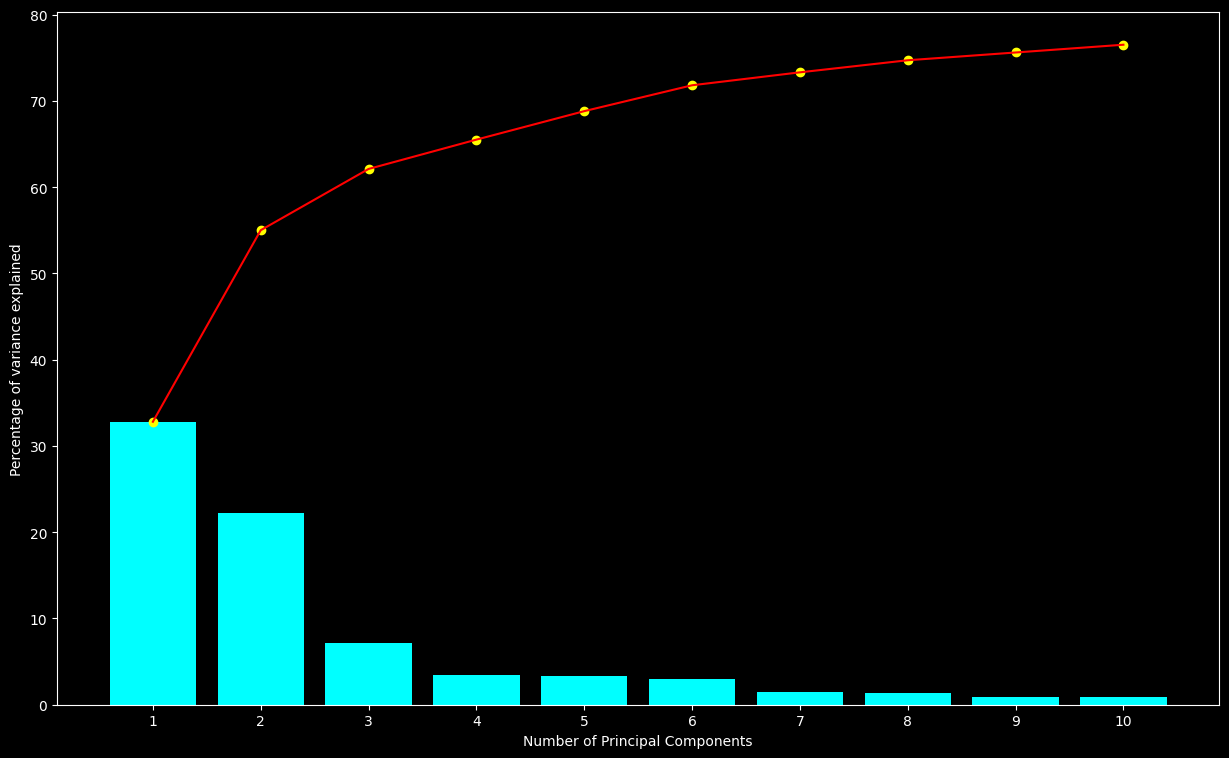

In [73]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [76]:
import pandas as pd
samplelist_trimmed = samplelist[:pca_data.shape[0]]
pca_df = pd.DataFrame(pca_data, index=samplelist_trimmed, columns=labels_all[:pca_data.shape[1]])
final_df = pd.DataFrame(columns=["StrainID", "PC1", "PC2", "State"])
for sample in pca_df.index:
    dicti = {}
    dicti["StrainID"] = sample

    dicti["PC1"] = pca_df.loc[sample, "PC1"] if "PC1" in pca_df.columns else None
    dicti["PC2"] = pca_df.loc[sample, "PC2"] if "PC2" in pca_df.columns else None

    match = data[data["StrainID"] == sample]
    dicti["State"] = match["State"].tolist()[0] if not match.empty else "Unknown"
    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)
final_df.tail()


/tmp/ipython-input-3736091254.py:14: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,StrainID,PC1,PC2,State
639,hCoV-19/India/S5/2020|EPI_ISL_430465|2020-03-28,-0.254246,-0.104602,West Bengal
640,hCoV-19/India/S50/2020|EPI_ISL_455670|2020-05-03,-0.253592,-0.170118,West Bengal
641,hCoV-19/India/S51/2020|EPI_ISL_455671|2020-05-03,-0.209436,-0.169489,West Bengal
642,hCoV-19/India/S52/2020|EPI_ISL_455672|2020-05-03,-0.253592,-0.170118,West Bengal
643,hCoV-19/India/S53/2020|EPI_ISL_455673|2020-05-02,-0.254096,-0.104511,West Bengal


In [77]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_states = final_df.State.tolist()
for_hover = final_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, height=600, width=1200,
                 title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})
fig.show(renderer = 'colab')